<h1 style="color:rgb(0,120,170)">Assignment 1: $k$-nearest neighbors</h1>

<h2 style="color:rgb(0,120,170)">Copyrighting and Fare Use</h2>

This material, no matter whether in printed or electronic form,
may be used for personal and non-commercial educational use
only. Any reproduction of this material, no matter whether as a
whole or in parts, no matter whether in printed or in electronic
form, requires explicit prior acceptance of the authors.

<h2 style="color:rgb(0,120,170)">Automatic Testing Guidelines</h2>

Automatic unittesting requiers you, as a student, to submit notebook which contains strictly defined objects.
Strictness of definition consists of unified shapes, dtypes, variable names and more.<br>
Within the notebook we provide detailed instruction which you may want to follow, in order to maximise your final grade.

**Name your notebook properly**, follow the pattern in template name:

**Assignment_N_NameSurname_matrnumber**
<ol>
    <li>N - number of assignment</li>
    <li>NameSurname - your full name where evry part of the name strats from capital letter, no spaces</li>
    <li>matrnumber - you student number on ID card (without k)</li>
</ol>

Adding cells might badly influence your sumbission, in case if implementations in cells will depend on unexpected ones.
You may notice, that most cells are tagged, that is the way for unittest routine to recognise them.
We highly recommend you to develop your code within provided cells.

**If you delete any cell or tag**, it will be hard to evaluate respective part of assingment.

**Please be careful**, and may force be with you.

<h2 style="color:rgb(0,120,170)">Task 1: Visualization</h2>

Visualize the data stored in `DataSet1.csv` with a scatter plot.<br>
The first two columns are the features which hold the x and y coordinates of the data.<br>
The last column provides the labels of the data. Use different colors for different labels.<br>
Always label the axes of all your plots.

In [1]:
import sklearn
import numpy as np
import matplotlib.pyplot as plt

<h3 style="color:rgb(210,90,80)">Code 1 (20 points):</h3>

In [2]:
# read data, split into X(features) and y(labels)
Z = np.genfromtxt('DataSet1.csv', delimiter=';')
X, y = Z[:,:-1], Z[:,-1]

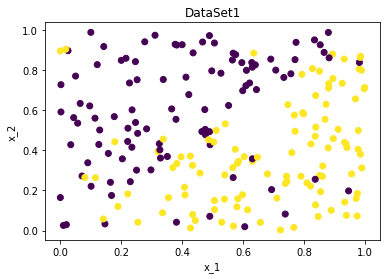

In [3]:
#your code goes here ↓↓↓
plt.xlabel('x_1')
plt.ylabel('x_2')
plt.title('DataSet1')
plot1 = plt.scatter(X[:,0], X[:,1], c=y)

<h3 style="color:rgb(210,90,80)">Question 1 (5 points):</h3>

***Which of the following statements about $k$-nearest neighbors is correct?***<br>
(Multiple answers might be correct)

a_) requires long training time <br>
b_) not suited for large datasets <br>
c_) sensitive to the rescaling of individual features <br>
d_) has many trainable model parameters <br>

To answer the question assign to variables in the nex cell **True** or **False** boolean values. 
To earn points **assign values to all variables**.<br>
**NOTE** Do not reuse these variable names. They are used for testing.

In [4]:
#examples for you
example_of_true_variable = True
example_of_false_variable = False

#your answers go here ↓↓↓
a_=False
b_=False
c_=True
d_=False

<h2 style="color:rgb(0,120,170)">Task 2: Training the model</h2>

Use $k$-nearest neighbors classifiers with $k \in \{1,3,5,...,177,179\}$.<br>
Either use the `KNeighborsClassifier` function from `sklearn` or implement it on your own.<br>
Estimate the generalization error with **zero-one loss** via the empirical risk (see lecture Unit 1, p.25 ff.) and use **10-fold** cross validation.<br>
Visualize your results, i.e., plot the error (as defined above) vs. $k$ of $k$-nearest neighbors classifiers.
<br>
<br>
Hint: implement a function that takes the feature matrix ($X$), the label vector ($y$), the number of CV folds ($nf$), $k$ of the $k$-nearest neighbors classifiers ($k$) as arguments:<br>
`def evaluate_kNN(X,y,nf,k):`<br>
It should return the mean error (as defined above) over the CV folds.

<h3 style="color:rgb(210,90,80)">Code 2 (15 points):</h3>

In [5]:
#method for kNN method
from sklearn.model_selection import KFold
from sklearn import neighbors

#your code goes here ↓↓↓
from sklearn.metrics import zero_one_loss
"""
Function evaluate_kNN hints:
@param X, np ndarray, feature matrix
@param y, np array, labels vector
@param kfold, Integer number of CV folds
@param n_neighbors, Integer number of neighbors in KNN

@returns floating number
Please use this function template and don't change function name.
"""
def evaluate_kNN(X,y,kfold,n_neighbors): 
    
    kf = KFold(n_splits=kfold, shuffle=False)
    total_error = 0
    
    for train_index, val_index in kf.split(X):
        
        knn = neighbors.KNeighborsClassifier(n_neighbors=n_neighbors)
        
        # split in train-sets and validation-sets
        X_train, y_train = X[train_index], y[train_index]
        X_val, y_val = X[val_index], y[val_index]
        
        knn.fit(X_train, y_train)
        
        total_error += zero_one_loss(y_true=y_val, y_pred=knn.predict(X_val), normalize=True)  # normalize=True --> empricial risk
        
    return total_error / kfold

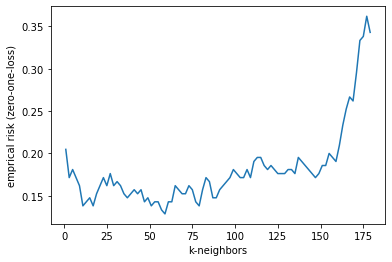

In [6]:
#define error_holder via calling evaluate_kNN function.
error_holder = [evaluate_kNN(X, y, 10, k) for k in range(1, 180, 2)]

#implement the plot as described in the task
plt.ylabel('emprical risk (zero-one-loss)')
plt.xlabel('k-neighbors')
plot2 = plt.plot(list(range(1, 180, 2)), error_holder)

<h3 style="color:rgb(210,90,80)">Question 2 (10 points):</h3>

<i><b>Thinking of model complexity as the ability of the model to fit to noise, what choice of $k$ gives complex models? Why?</b></i><br>
(Multiple answers might be correct)

e_) Model complexity increases with increasing $k$, as larger $k$ means the model has more parameters. <br>
f_)  Model complexity increases with increasing $k$, as larger $k$ means that more neighbors influence the decision. <br>
g_)  Model complexity increases with decreasing $k$, as smaller $k$ means that fewer neighbors influence the decision. <br>
h_)  Model complexity increases with decreasing $k$, as smaller $k$ means the model has fewer parameters. <br>

To answer the question assign to variables in the nex cell **True** or **False** boolean values. 
To earn points **assign values to all variables**.<br>
**NOTE** Do not reuse these variable names. They are used for testing.

In [7]:
#examples for you
example_of_true_variable = True
example_of_false_variable = False

#your answers go here ↓↓↓
e_=False
f_=False
g_=True
h_=False

<i><b>For the data above, how does the error develop with the model complexity? Why? Look again at the data - do the labels appear to be noisy?</b></i>
<br>(Multiple answers might be correct)


i_) The error increases with increasing $k$, as there is hardly any noise in the data <br>
j_) The error increases with increasing $k$, as there is a lot of noise in the data <br>
k_) The error increases with decreasing $k$, as there is hardly any noise in the data <br>
l_) The error increases with decreasing $k$, as there is a lot of noise in the data <br>

To answer the question assign to variables in the nex cell **True** or **False** boolean values. 
To earn points **assign values to all variables**.<br>
**NOTE** Do not reuse these variable names. They are used for testing.

In [8]:
#examples for you
example_of_true_variable = True
example_of_false_variable = False

#your answers go here ↓↓↓
i_=True
j_=False
k_=False
l_=False

<h2 style="color:rgb(0,120,170)">Task 3: Add noise to labels</h2>

Write a function **flip(y)**, which will take labels vector **y** as an argument, <br> flip the sign of the labels randomly with probability of $\frac{1}{7}$, and return a **new** labels vector. 

Use the random seed given below. <br>Perform the same steps as before, i.e. plot the data and plot the error (estimated via the empirical risk) vs. $k$ for **10-fold** cross validation.

<h3 style="color:rgb(210,90,80)">Code 3 (15 points):</h3>

In [9]:
#your code goes here ↓↓↓
"""
Function flip hints:
@param y, np array, labels vector
@returns np.array of the same shape as original y.

Please use this function template and don't change function name.
"""
def flip(y):
    np.random.seed(1234)
    flip_mask = np.array(np.random.choice([1,-1], p=[1-1/7, 1/7], size = y.shape))
    y_flipped = y * flip_mask
        
    return y_flipped

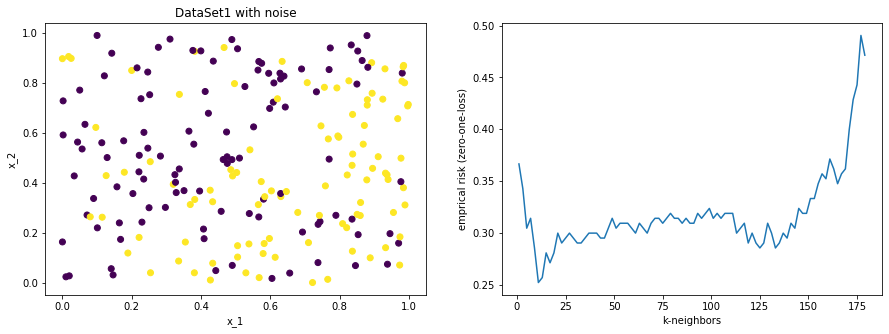

In [10]:
#define new y vector by calling flip function
y_fl = flip(y)

#perform evaluation on a new data
#redefine error_holder via calling evaluate_kNN function.
error_holder = [evaluate_kNN(X, y_fl, 10, k) for k in range(1, 180, 2)]

#your plotting code goes here ↓↓↓
plot3 = plt.subplots(1, 2, figsize=(15, 5))

plot3[1][0].set_ylabel('x_2')
plot3[1][0].set_xlabel('x_1')
plot3[1][0].set_title('DataSet1 with noise')
plot3[1][0].scatter(X[:, 0], X[:, 1], c=y_fl)

plot3[1][1].set_ylabel('emprical risk (zero-one-loss)')
plot3[1][1].set_xlabel('k-neighbors')
plot3[1][1].plot(list(range(1, 180, 2)), error_holder)

#p4 = plt.scatter(X[:,0], X[:,1], c=y_fl)

<h3 style="color:rgb(210,90,80)">Question 3 (10 points)</h3>

***Which differences do you observe?<br>
Which conclusions do you draw from that?***
<br>(Multiple answers might be correct)


n_) The two classes are still well seperable and have nearly no overlap <br>
m_)  The two classes are now less seperable and have a larger overlap  <br>

o_)  Random label flipping brings noise into the data <br>
p_)  Random label flipping simply swaps data, but no significant changes <br>

q_)  Very small values of $k$ correspond to too low model complexity (underfitting) <br>
r_)  Very small values of $k$ correspond to too high model complexity (overfitting) <br>
s_)  Very large values of $k$ correspond to too low model complexity (underfitting) <br>
t_)  Very large values of $k$ correspond to too high model complexity (overfitting) <br>

u_)  Overall, the error remains nearly unchanged compared to the original data set. <br>
v_)  Overall, the error increases compared to the original data set. <br>

To answer the question assign to variables in the nex cell **True** or **False** boolean values. 
To earn points **assign values to all variables**.
<br>
**NOTE** Do not reuse these variable names. They are used for testing.

In [11]:
#examples for you
example_of_true_variable = True
example_of_false_variable = False

#your answers go here ↓↓↓
n_=False
m_=True

o_=True
p_=False

q_=False
r_=True
s_=True
t_=False

u_=False
v_=True

<h2 style="color:rgb(0,120,170)">Task 4: $k$-NN in higher dimensions</h2>

Going back to **unflipped labels**. 
Write a function **add_features(X)** which will modify feature matrix X by adding 4 additional features. Each feature is uniformly distributed between 0 an 1.<br>


As before plot the error versus $k$ for **10 folds** for each feature matrix X with one, two, three and four incrementally added features. <br>
Additionaly plot mean error versus $f$ for $k$ = 11.<br>
As a result you need to show 5 plots.

<h3 style="color:rgb(210,90,80)">Code 4 (20 points):</h3>

In [12]:
#your code goes here ↓↓↓
"""
Function add_features hints:
@param X, np ndarray, feature matrix
@returns np.array with the same properties as matrix X but new shape.

Please use this function template and don't change function name."""
def add_features(X):
    np.random.seed(1234)
    
    # create new np.array
    X_expanded = np.empty(shape=(X.shape[0], X.shape[1]+4))
    
    # fill X_expanded
    X_expanded[:, :2] = X
    X_expanded[:, 2:] = np.random.uniform(size=(X_expanded.shape[0], 4))
    
    return X_expanded

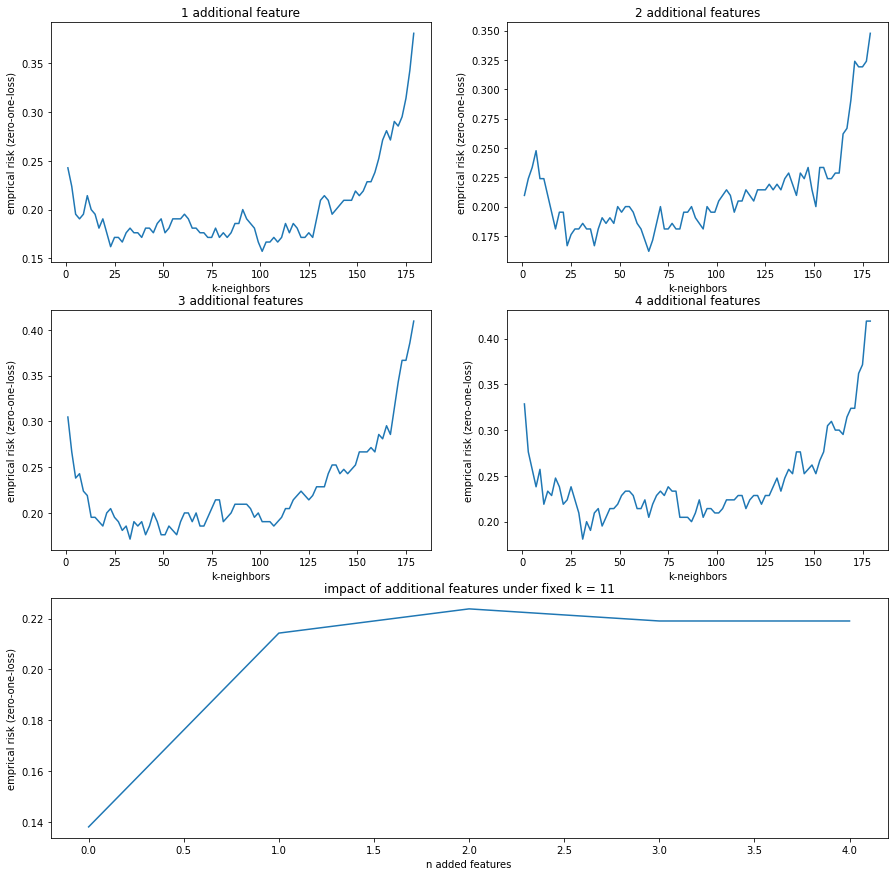

In [13]:
#define new feature matrix by calling add_features function
X_new = add_features(X)

error_holder_1 = [evaluate_kNN(X_new[:,:3], y, 10, k) for k in range(1, 180, 2)]
error_holder_2 = [evaluate_kNN(X_new[:,:4], y, 10, k) for k in range(1, 180, 2)]
error_holder_3 = [evaluate_kNN(X_new[:,:5], y, 10, k) for k in range(1, 180, 2)]
error_holder_4 = [evaluate_kNN(X_new[:,:6], y, 10, k) for k in range(1, 180, 2)]
error_holder_f = [evaluate_kNN(X_new[:,:n_features], y, 10, 11) for n_features in [2, 3, 4, 5, 6]]

#show 5 plots
fig, axs = plt.subplots(3, 2, figsize=(15, 15))
gridspec = axs[0, 0].get_subplotspec().get_gridspec()

axs[0,0].set_title('1 additional feature')
axs[0,0].set(xlabel='k-neighbors', ylabel='emprical risk (zero-one-loss)')
axs[0,0].plot(list(range(1, 180, 2)), error_holder_1)

axs[0,1].set_title('2 additional features')
axs[0,1].set(xlabel='k-neighbors', ylabel='emprical risk (zero-one-loss)')
axs[0,1].plot(list(range(1, 180, 2)), error_holder_2)

axs[1,0].set_title('3 additional features')
axs[1,0].set(xlabel='k-neighbors', ylabel='emprical risk (zero-one-loss)')
axs[1,0].plot(list(range(1, 180, 2)), error_holder_3)

axs[1,1].set_title('4 additional features')
axs[1,1].set(xlabel='k-neighbors', ylabel='emprical risk (zero-one-loss)')
axs[1,1].plot(list(range(1, 180, 2)), error_holder_4)  

plot4 = plt.subplot(3, 1, 3)
plot4.set_title('impact of additional features under fixed k = 11')
plot4.set(xlabel='n added features', ylabel='emprical risk (zero-one-loss)')
plot4.plot([0, 1, 2, 3, 4], error_holder_f)

<h3 style="color:rgb(210,90,80)">Question 4 (5 points)</h3>

***Try to explain possible changes of the error.***
<br>(Multiple answers might be correct)

w_) $k$-nearest neighbors is robust against randomly added further features; noise is filtered out <br>
x_)  $k$-nearest neighbors is not robust aginst randomly added further features; noise is not filtered out

y_)  The more noise (extra dimensions), the lower the optimal $k$ <br>
z_)  The more noise (extra dimensions), the higher the optimal $k$ <br>

To answer the question assign to variables in the nex cell **True** or **False** boolean values. 
To earn points **assign values to all variables**.<br>
**NOTE** Do not reuse these variable names. They are used for testing.

In [14]:
#examples for you
example_of_true_variable = True
example_of_false_variable = False

#your answers go here ↓↓↓n=True
w_=False
x_=True

y_=False
z_=True

<h2 style="color:rgb(0,120,170)">Tehnical cells</h2>

The cells below are needed for efficient unittesting.
Do not delete or change in order to receive proper evaluation.<br>
Executability check might help you.

In [15]:
def evaluate_kNN_tl(X,y,kfold,n_neighbors):
    try:
        return evaluate_kNN(X,y,kfold,n_neighbors)*1
    except:
        raise ValueError("evaluate_kNN does not return number")

def flip_tl(y):
    try:
        return flip(y).tolist()
    except:
        raise ValueError("flip does not return np array")

def add_features_tl(X):
    try:
        return add_features(X).tolist()
    except:
        raise ValueError("add_features does not return np array")

In [16]:
#executability check
evaluate_kNN_tl(X,y,10,5)
flip_tl(y)
add_features_tl(X)
print("Executable")

Executable
